In [1]:
import numpy as np
import renormalization as rg
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Renormalization group flow

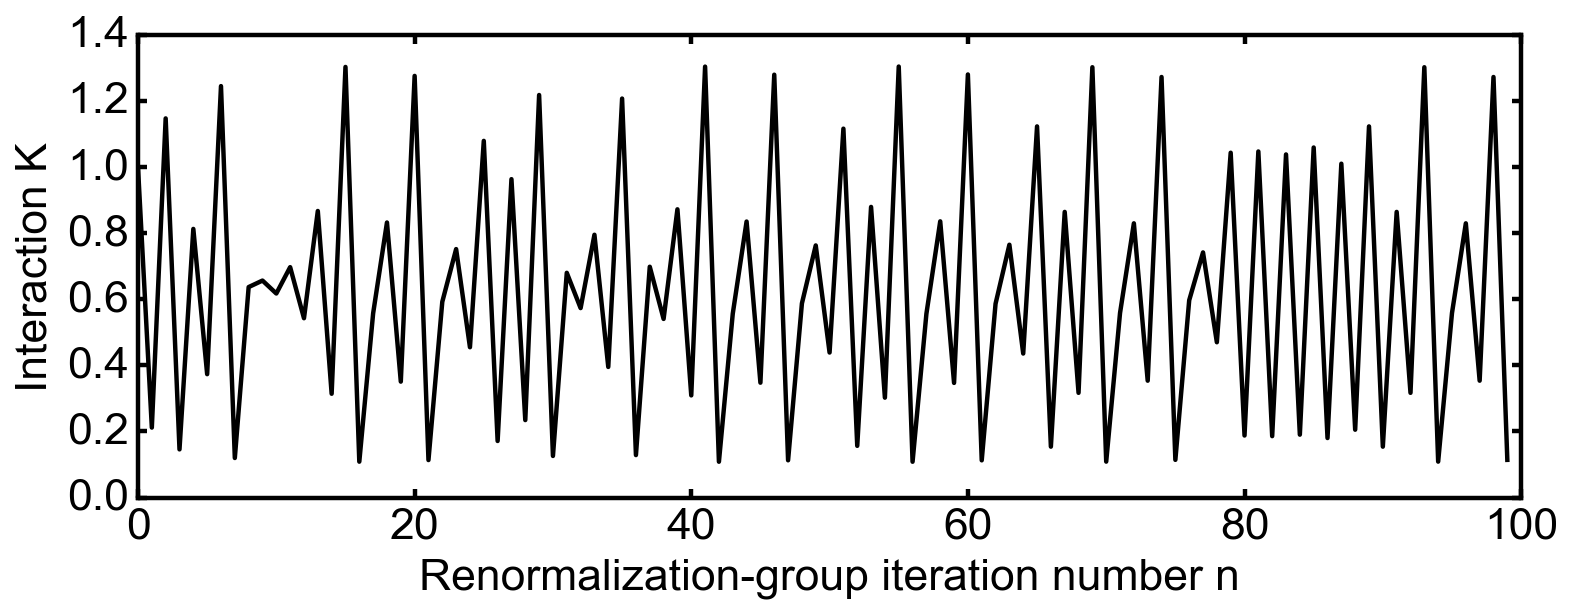

In [4]:
# Model parameters
m1 = 7
m2 = m1 + 1
p = 4
pb = 40
pc = 1

K = 1
n = 100
flow = rg.renormalization_group_flow(K, m1, m2, p, pb, pc, n)

# Plot trajectory
lw = 2
fs = 20
fig = plt.figure(figsize=(10, 4))
fig.set_facecolor('none')
plt.style.use('classic')
plt.rc('lines', linewidth=lw)
plt.rc('axes', linewidth=lw)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default':'regular'})

ax = plt.subplot(111)
ax.plot(flow[:,0], flow[:,1], linestyle='-', marker='', markersize=10, color='black')

#ax.legend(loc='upper right', ncol=1, prop={'size':fs - 8}, labelspacing=0.5, handlelength=1.4, handletextpad=0)
ax.tick_params(axis="both", direction="in", left=True, width=lw, length=4, labelsize=fs)
ax.set_xlabel("Renormalization-group iteration number n", fontsize=fs)
ax.set_ylabel("Interaction K", fontsize=fs)
plt.tight_layout()
plt.show()
#fig.savefig('chaotic_flow', bbox_inches="tight")

# Bifurcation diagram

In [24]:
# Model parameters
m1 = 7
m2 = m1 + 1
p = 4
pb = 40
pc = 1

n = 2**8

# Compute the diagram
increment = 1e-1
parameters = np.arange(start=1, stop=100 + increment, step=increment)

fixed_points = []
for i, parameter in enumerate(parameters):
    
    pb = parameter

    # Initial 1/temperature
    K = 1
    
    tanhK = []
    for k in range(n):
        
        K = rg.renormalize(K, m1, m2, p, pb, pc)
        
        if k > 100:
            tanhK.append(round(np.tanh(K), 3))
        
    fixed_points.append(tanhK)

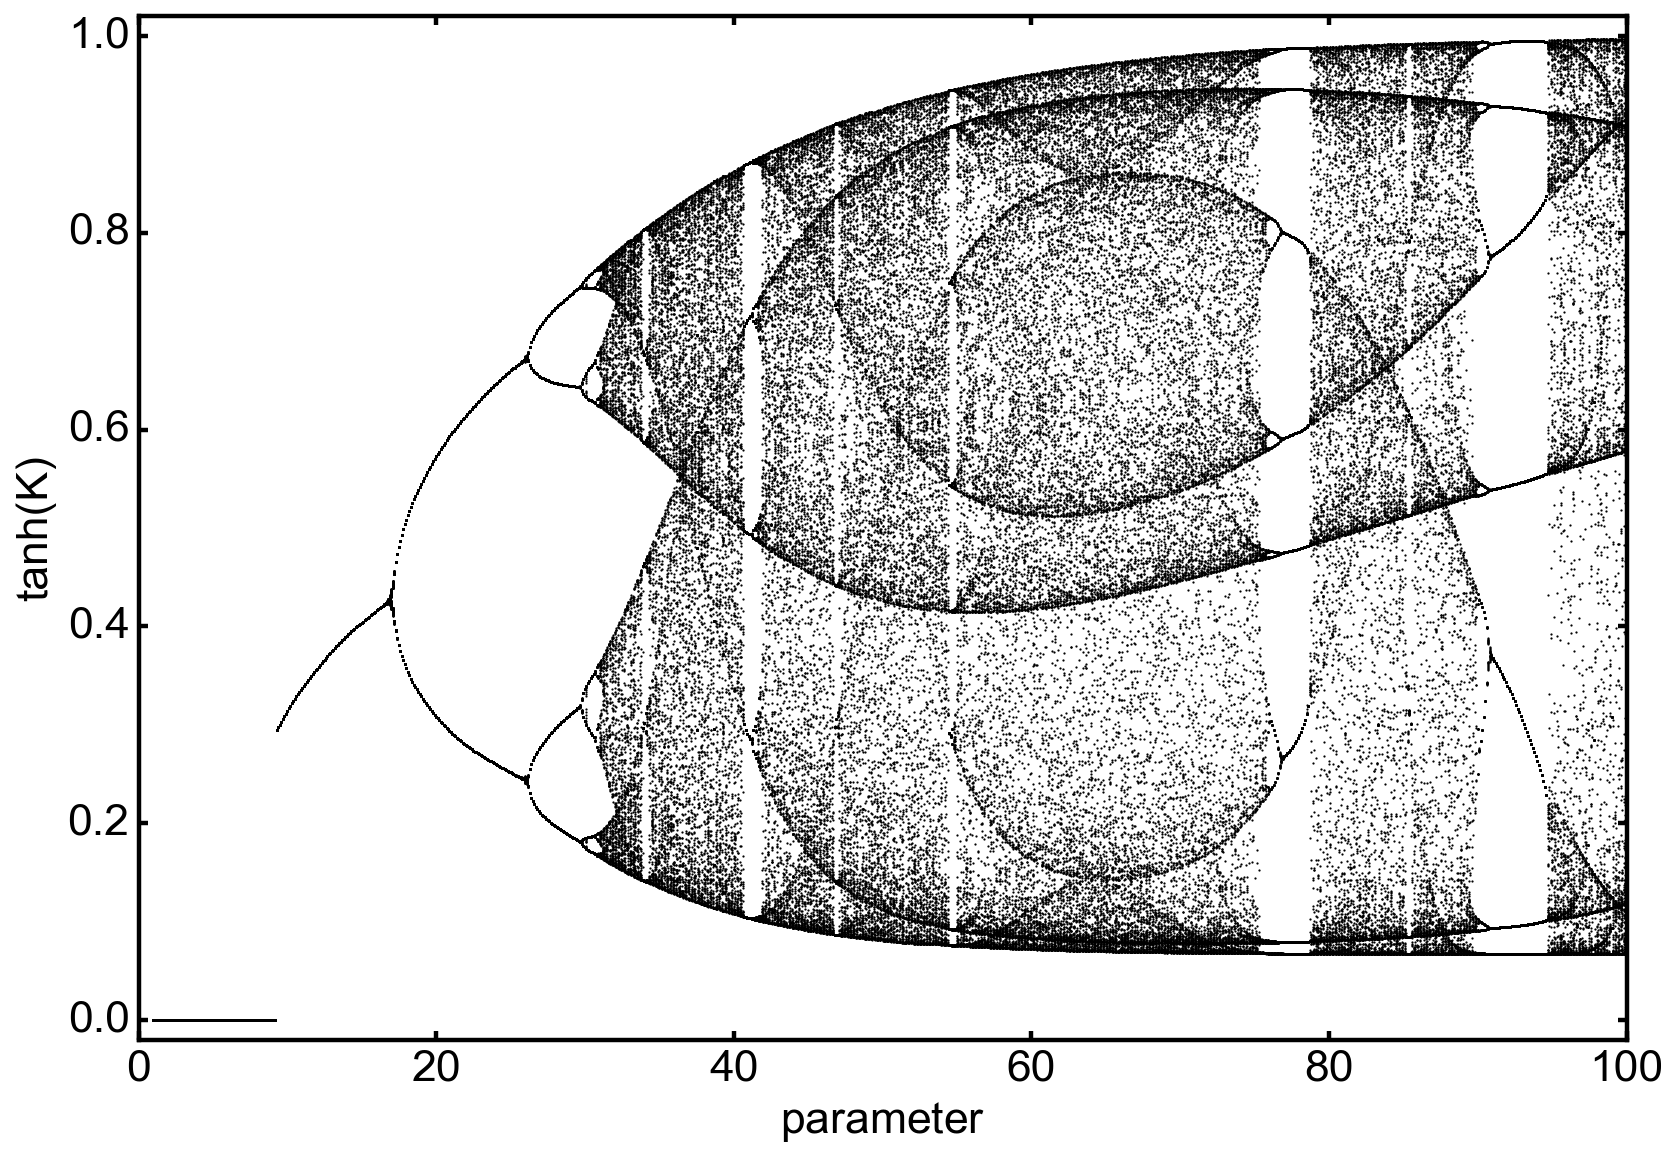

In [30]:
lw = 2
fs = 20
fig = plt.figure(figsize=(12, 8))
fig.set_facecolor('none')
plt.style.use('classic')
plt.rc('lines', linewidth=lw)
plt.rc('axes', linewidth=lw)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'mathtext.default':'regular'})

ax = plt.subplot(111)
ax.plot(parameters, fixed_points, marker='.', ms=1, ls='', c='black')
ax.tick_params(axis="both", direction="in", left=True, width=lw, length=4, labelsize=fs)
ax.set_ylabel("tanh(K)", fontsize=fs)
ax.set_xlabel(r"$parameter$", fontsize=fs)
ax.set_ylim(-0.02, 1.02)
#ax.axis([0, 100, -0.02, 1.02])
plt.show()